# Simulations EMV

In [27]:
import numpy as np
import matplotlib.pyplot as plt

* Définition des paramètres:

In [89]:
%matplotlib inline
T=1                     #On fait une discrétisation sur [0,T]  
N_steps= 2* (10**5)          #nombre d'itérations
step=T/N_steps          #pas de temps
dates = np.arange(1,N_steps,T)
dates = step*dates

In [70]:
x0= 1
sigma= 0.03
theta= 0.2

* Fonction pour afficher les trajectoires

In [71]:
def plot_trajectoires(process,model):
    fig = plt.figure(figsize=(10,8))
    ax = plt.axes(xlim=(0, 1)) 
    line, = ax.step([], [], where='mid', color='#0492C2')
    ax.set_xticks(np.linspace(0,1,11))
    ax.set_xlabel('Time', fontsize=10)
    ax.set_ylabel('Value', fontsize=10)
    ax.tick_params(labelsize=22)
    ax.grid(True, which='major', linestyle='--', color='black', alpha=0.6)

    plt.plot(dates,process)
    ax.set_title('{} for {} steps'.format(model,N_steps), fontsize=10)
    plt.show()

### Mouvement brownien avec dérive

Pour simuler un mouvement brownien avec dérive, on se sert d'une approximation par schéma d'Euler.

<font color="blue">
$X_{t_{i+1}}=X_{t_i} + \theta (t_{i+1}-t_i) + \sigma \sqrt{t_{i+1}-t_i} Z_i \:$ où $Z_i \sim \mathcal{N} (0,\,1)$

$X_{t_{i+1}}=X_{t_i} + \theta \Delta t + \sigma \sqrt{\Delta t} Z_i \:$

In [72]:
def MB(x0,theta,sigma,dates):
    X=[x0]
    #N_steps=len(dates)+1
    for i in range(N_steps-2):
        z=np.random.normal()
        mean=X[i]+theta*(dates[i+1]-dates[i])
        var=(sigma**2)*(dates[i+1]-dates[i])
        X+=[mean + np.sqrt(var)*z]
    return X

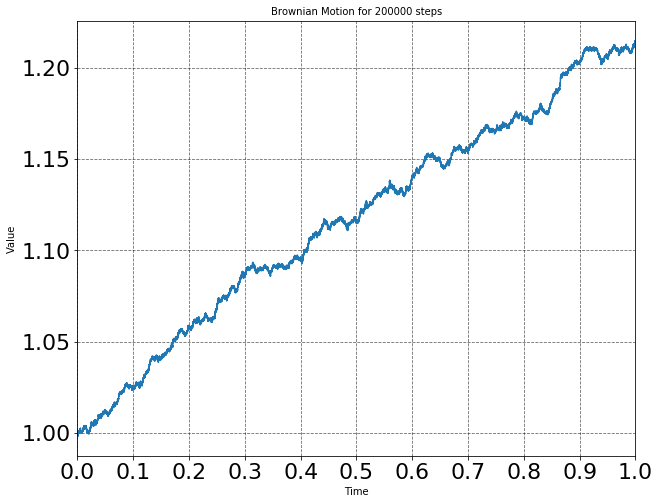

In [68]:
Brownian_Motion= MB(x0,theta,sigma,dates)
plot_trajectoires(Brownian_Motion,"Brownian Motion")

* Illustration de la convergence de l'EMV (Mouvement Bbrownien avec dérive)

In [33]:
def MLEMB(processus) :
    estimateur=[]
    for i in range(1,len(processus)):
        estim= (processus[i]-processus[0])/(dates[i]-dates[0])
        estimateur.append([estim])
    return estimateur

Value of MLE:   [0.17477868189906237]
Value of MLE:   [0.2583690430469094]
Value of MLE:   [0.22163620023085087]


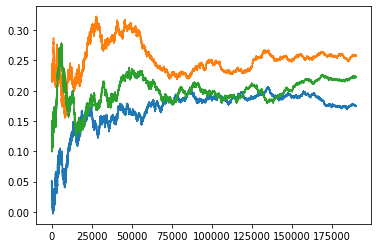

In [34]:
plt.figure()
for j in range(3):
    MouvB=MB(x0,theta,sigma,dates)
    print("Value of MLE:  ", MLEMB(MouvB)[-1])
    plt.plot(MLEMB(MouvB)[10000:] )#on commence par 10000 pour mieux observer la convergence de l'estimateur vers theta

<font color="blue">
On observe que l'estimateur s'approche bien de $\theta$. Mais, les résultats sont quand mêmes assez aléatoires.

### Processus d'Ornstein - Uhlenbeck

<font color="blue">
$\mathrm{d}X_t= -\theta X_t \mathrm{d}t + \sigma \mathrm{d}B_t$

$ X_{t_{i}}^{(n)} - X_{t_{i-1}}^{(n)} \approx -\theta (t_i- t_{i-1}) X_{t_{i-1}}^{(n)} + \sigma (B_{t_i} - B_{t_{i-1}})$

$ X_{t_{i}}^{(n)} - X_{t_{i-1}}^{(n)} \approx -\theta (t_i- t_{i-1}) X_{t_{i-1}}^{(n)} + \sigma \sqrt{t_{i}-t_{i-1}} Z_i \:$ où $Z_i \sim \mathcal{N} (0,\,1)$


$ X_{t_{i}}^{(n)} - X_{t_{i-1}}^{(n)} \approx -\theta \Delta t X_{t_{i-1}}^{(n)} + \sigma \sqrt{\Delta t} Z_i \:$

In [73]:
def OU(x0,theta,sigma,dates):
    X=[x0]
    #N_steps= len(dates)+1
    for i in range(N_steps-2):
        z=np.random.normal()
        mean=X[i]*(1-theta*(dates[i+1]-dates[i]))
        var=(sigma**2)*(dates[i+1]-dates[i])
        X+=[mean + np.sqrt(var)*z]
    return X

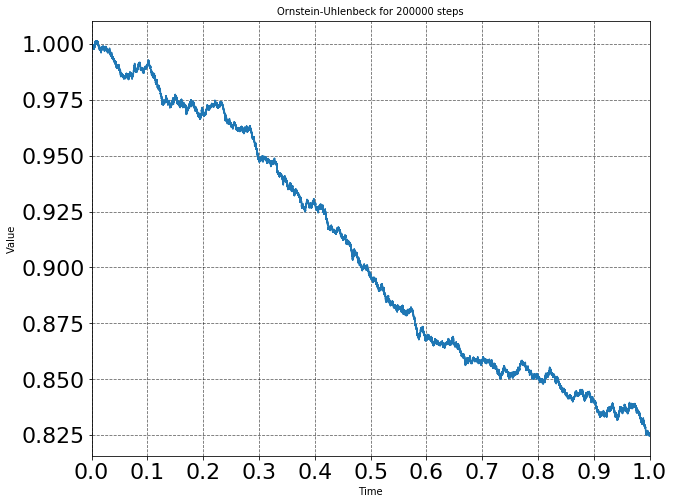

In [36]:
OrnsUh=OU(x0,theta,sigma,dates)
plot_trajectoires(OrnsUh,'Ornstein-Uhlenbeck')

* Illustration de la convergence de l'EMV (Ornstein Uhlenbeck)

In [74]:
#Maximum likelihood estimator
def MLEOU(processus) :
    Num=0
    Den=0
    estimateur=[]
    #N_steps=len(dates)+1
    h=T/ (N_steps-1)
    for i in range(1,len(processus)):
        Num+= processus[i-1]*(processus[i]-processus[i-1])
        Den+=(processus[i-1]**2)* h
        estimateur.append([-(Num/Den)])
    return estimateur

Value of MLE:   [0.1656080917593971]
Value of MLE:   [0.22428896377882193]
Value of MLE:   [0.22012163739606228]


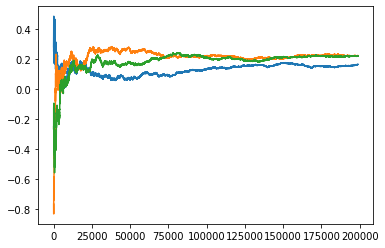

In [38]:
plt.figure()
for j in range(3):
    OrnsUh=OU(x0,theta,sigma,dates)
    print("Value of MLE:  ", MLEOU(OrnsUh)[-1])
    plt.plot(MLEOU(OrnsUh)[1000:]  )

### Black Scholes

<font color="blue">

$\mathrm{d}X_t= \theta X_t \mathrm{d}t + \sigma X_t \mathrm{d}B_t$

$X_{t_{i}}^{(n)} \approx X_{t_{i-1}}^{(n)}[1+\theta(t_{i}-t_{i-1}) +
\sigma (B_{t_{i}} - B_{t_{i-1}})]$

$X_{t_{i}}^{(n)} \approx X_{t_{i-1}}^{(n)}[1+\theta(t_{i}-t_{i-1}) +
\sigma \sqrt{t_{i+1}-t_i} Z_i] \:$ où $Z_i \sim \mathcal{N} (0,\,1)$


$X_{t_{i}}^{(n)} \approx X_{t_{i-1}}^{(n)}[1+\theta \Delta t +
\sigma \sqrt{\Delta t} Z_i] \:$ où $Z_i \sim \mathcal{N} (0,\,1)$



In [75]:
def BS(x0,theta,sigma,dates):
    X=[x0]
    #N_steps=len(dates)+1
    for i in range(N_steps-2):
        s=np.random.normal()
        proc=X[i]
        mean=proc*(1+theta*(dates[i+1]-dates[i]))
        var=proc**2*(sigma**2)*(dates[i+1]-dates[i])
        X+=[mean + np.sqrt(var)*s]
    return X

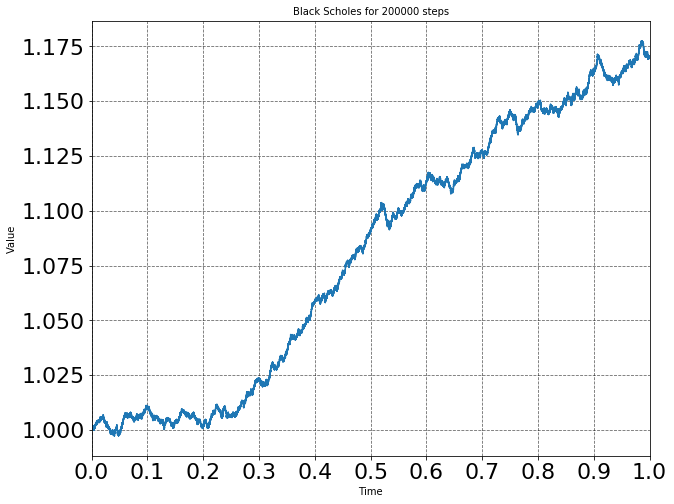

In [40]:
BlackS=BS(x0,theta,sigma,dates)
plot_trajectoires( BlackS,'Black Scholes')

In [41]:
def MLEBS(processus) :
    Num=0
    Den=0
    estimateur=[]
    for i in range(1,len(processus)):
        Num+=processus[i]-processus[i-1]
        Den+=processus[i-1]*(dates[i]-dates[i-1])
        estimateur.append([Num/Den])
    return estimateur

Value of MLE:   [0.18602403704641188]
Value of MLE:   [0.20992673145198468]
Value of MLE:   [0.18416866070656596]


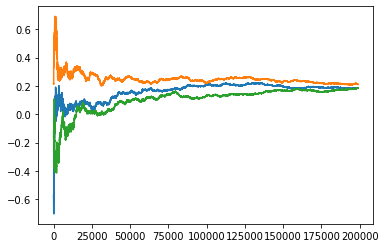

In [42]:
plt.figure()
for j in range(3):
    BlackS=BS(x0,theta,sigma,dates)
    print("Value of MLE:  ", MLEBS(BlackS)[-1])
    plt.plot(MLEBS(BlackS)[1000:])

### Cox-Ingersoll-Ross

On chosit bien la valeur de X0 de sorte que tous les Xt soient positifs à cause de la racine carrée.

<font color="blue">
$\mathrm{d}X_t= (a-\theta X_t) \mathrm{d}t + \sigma \sqrt{X_t} \mathrm{d}B_t$

$ X_{t_{i}}^{(n)} - X_{t_{i-1}}^{(n)} \approx (a-\theta  X_{t_{i-1}}^{(n)})(t_i- t_{i-1}) + \sigma \sqrt{X_{t_{i-1}}} (B_{t_i} - B_{t_{i-1}})$

$ X_{t_{i}}^{(n)} - X_{t_{i-1}}^{(n)} \approx (a-\theta  X_{t_{i-1}}^{(n)})(t_i- t_{i-1}) + \sigma \sqrt{X_{t_{i-1}}(t_{i}-t_{i-1})} Z_i \:$ où $Z_i \sim \mathcal{N} (0,\,1)$

$ X_{t_{i}}^{(n)} - X_{t_{i-1}}^{(n)} \approx (a-\theta  X_{t_{i-1}}^{(n)})\Delta t + \sigma \sqrt{X_{t_{i-1}}\Delta t} Z_i \:$

In [76]:
def CIR(x0,a,theta,sigma,time):
    X=[x0]
    #N_steps=len(time)+1
    for i in range(N_steps-2):
        z=np.random.normal()
        dt=time[i+1]-time[i]
        moy=X[i]+(a-theta*X[i])*dt
        var=(sigma**2)*X[i]*dt
        X+=[moy + np.sqrt(var)*z]
    return X

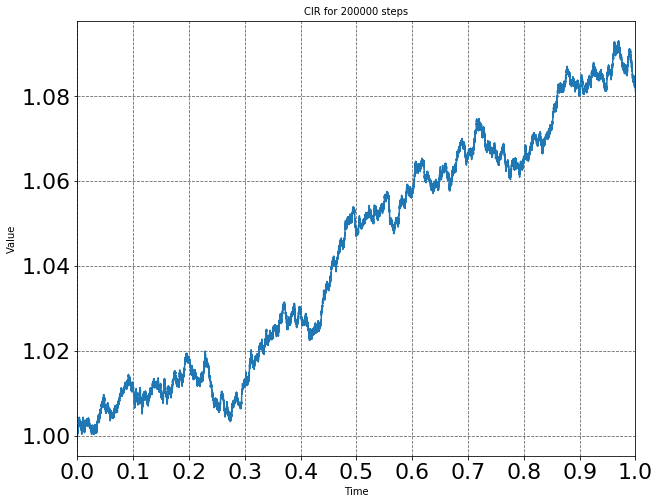

In [44]:
a=0.3
Cox=CIR(x0,a,theta,sigma,dates)

plot_trajectoires( Cox,'CIR')

* Illustration de la convergence de l'EMV (Modèle de Cox-Ingersoll-Ross)

$\hat{\theta}_{MV}=\frac{aT-X_T+X_0}{\int_{0}^{T} X_s\,\mathrm{ds}}$

$\hat{\theta}_{MV}=\frac{aT-X_T+X_0}{\sum_{i=1}^{n} (t_i-t_{i-1})X_{t_{i-1}}}$

In [45]:
def MLECIR(processus) :
    Num=0
    Den=0
    estimateur=[]
    for i in range(1,len(processus)):
        TT=dates[i]-dates[0]
        Num=a*TT-processus[i]+processus[0]
        Den+=(dates[i]-dates[i-1])*processus[i-1]
        estimateur.append([Num/Den])
    return estimateur

Value of MLE:   [0.2027901378161386]
Value of MLE:   [0.22382144920547722]
Value of MLE:   [0.16992038493355824]


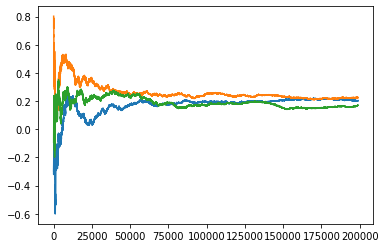

In [46]:
plt.figure()
for j in range(3):
    Cox=CIR(x0,a,theta,sigma,dates)
    print("Value of MLE:  ", MLECIR(Cox)[-1])
    plt.plot(MLECIR(Cox)[1000:])

* Influence du paramètre $\sigma$

Ayant observé que les résultats changent beaucoup en fonction du sigma choisi, nous décidons d'étudier l'influence sur l'estimateur.

In [83]:
def TestSigma(model,estimateur):
    error=[]
    for vol in sigma_values:
        processus=model(1,0.2,vol,dates)
        estimated =  estimateur(processus)[-1]
        error.append([np.abs(estimated[0]-0.2)])
    plt.plot(sigma_values,error,marker='*')
    plt.title("erreur d'estimation de theta selon différentes valeurs de sigma ")

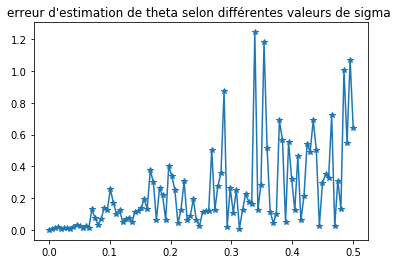

In [84]:
TestSigma(OU,MLEOU) #Ornstein Uhlenbeck

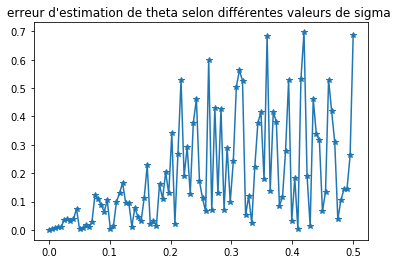

In [85]:
TestSigma(BS,MLEBS) #Black Scholes

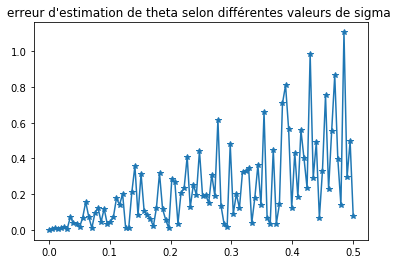

In [86]:
TestSigma(MB,MLEMB) #Mouvement brownien

Text(0.5, 1.0, "erreur d'estimation de theta selon différentes valeurs de sigma pour le modèle: ")

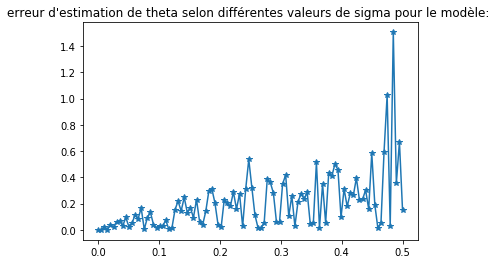

In [88]:
#Pour le modèle CIR
error=[]
for vol in sigma_values:
    processus=CIR(1,0.3,0.2,vol,dates)
    estimated =  MLECIR(processus)[-1]
    error.append([np.abs(estimated[0]-0.2)])
plt.plot(sigma_values,error,marker='*')
plt.title("erreur d'estimation de theta selon différentes valeurs de sigma pour le modèle: ")

Pour des valeurs de $\sigma$ entre 0 et 0.08, on a une erreur relativement faible. C'est pour cette raison qu'on a choisi 0.03 pour nos tests. 